<a href="https://colab.research.google.com/github/ssyss-513/MyColab/blob/main/chapter_10_How_to_Tell_if_Your_Toaster_is_Learning_%E2%80%93_Machine_Learning_Essentials.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# How to Tell if Your Toaster is Learning  


## Part 1 - Machine Learning Essentials

**In this section**
- Introducing Machine Learning  
- Example – Facial Recognition  
- ML isn’t perfect  
- How does ML work?  

> Goal: understand the core idea of “learning from data” through clear explanations and runnable code.




### Part 1.1 Introducing Machine Learning

**Definition**  
> Giving computers the ability to learn from data without being given explicit rules by a programmer.

- ML focuses on discovering **patterns (signals)** in data that may contain **noise**.  
- Unlike traditional algorithms (rule-based), ML learns rules from examples.  
- ML is one tool in a data-scientist’s toolkit; the key is knowing **when to use it**.

| Concept | Traditional Programming | Machine Learning |
|:--|:--|:--|
| Human Input | Explicit rules | Learn from data |
| Data Role | Used for testing | Used for learning |
| Flexibility | Fixed | Adaptive |
| Example | Sorting, search | Classification, prediction |

### Part 1.2 Example – Facial Recognition

**Task:** Given an image, determine whether it contains a human face.

#### A. Non-ML (rule-based)
- Hard-code facial features: round shape, two eyes, nose, mouth, etc.  
- The algorithm searches for these features directly.  
- Works for simple cases but fails under lighting or angle changes.

#### B. ML (data-driven)
- Provide many **labeled examples**: *Face* / *No Face*.  
- The model learns what distinguishes the two, without explicit definitions.  

<img src="https://drive.google.com/uc?id=1vbeqVUcYNIhYwblSEiytJMJ0iHhVqfo6" width="200">



In [ ]:
# Tiny demonstration: learn from data without explicit rules
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

digits = load_digits()
X = digits.data
y = (digits.target > 4).astype(int)  # pretend "Face" if digit >4, else "No Face"

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

clf = LogisticRegression(max_iter=2000)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print("Accuracy:", round(accuracy_score(y_test, y_pred), 3))
print("\nClassification Report:\n",
      classification_report(y_test, y_pred, target_names=["No Face", "Face"]))

Accuracy: 0.913

Classification Report:
               precision    recall  f1-score   support

     No Face       0.91      0.91      0.91       271
        Face       0.91      0.91      0.91       269

    accuracy                           0.91       540
   macro avg       0.91      0.91      0.91       540
weighted avg       0.91      0.91      0.91       540



### Part 1.3 ML isn’t Perfect

Common assumptions and limitations:

- **Clean data required:** models fail on messy or incomplete data.  
- **Representative samples:** training data must match the real task.  
- **Underlying relationships:** ML cannot invent a correlation that doesn’t exist.  
- **Semi-automatic nature:** humans still choose models, tune, interpret.  
- **Context blindness:** models output numbers; humans provide meaning.  
- **Noise sensitivity:** irrelevant features can confuse the model.


<img src="https://drive.google.com/uc?id=1sc5DBmQe_DkTjJQE6277p-iTk_rR4s4u" width="400">



### Part 1.4 How does ML work ?

Although algorithms vary, the basic idea is consistent:

> **Input Data → Learn Patterns → Output Predictions**

1. Provide data (features and labels).  
2. Model finds relationships and patterns.  
3. Model outputs predictions and metrics.


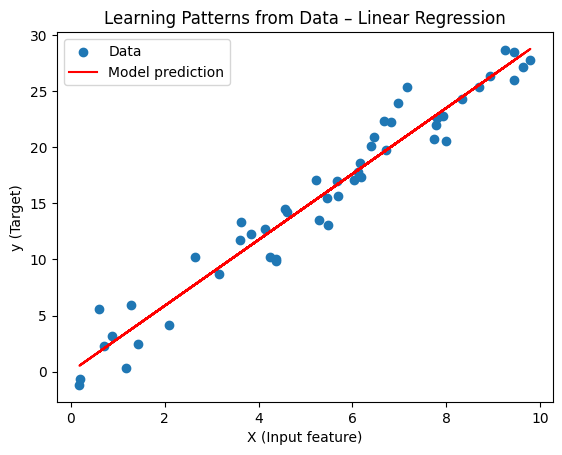

Learned slope (coef_): 2.94
Intercept: -0.01


In [ ]:
# Simple regression example: learn y = 3x + noise
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

np.random.seed(0)
X = np.random.rand(50, 1) * 10
y = 3 * X.squeeze() + np.random.randn(50) * 2

model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

plt.scatter(X, y, label="Data")
plt.plot(X, y_pred, color="red", label="Model prediction")
plt.xlabel("X (Input feature)")
plt.ylabel("y (Target)")
plt.title("Learning Patterns from Data – Linear Regression")
plt.legend()
plt.show()

print(f"Learned slope (coef_): {model.coef_[0]:.2f}")
print(f"Intercept: {model.intercept_:.2f}")

## Part 2 - Types of Machine Learning

Machine Learning (ML) can be divided in many ways — by data structure (trees, graphs, neural networks), by mathematical foundation (statistical or probabilistic), or by computational depth (e.g., Deep Learning).

At the highest level, we can group ML into three main subsets:
- **Supervised Learning (SL)**
- **Unsupervised Learning (UL)**
- **Reinforcement Learning (RL)**

In this section, we will explore each briefly, starting with **Supervised Learning**, which is the most commonly used.

### Part 2.1 Supervised Learning (SL)

**Concept:**  
Supervised learning finds associations between the **features** (independent variables) and a **target** (dependent variable).  
It uses **historical labeled data** — examples that include both inputs and their correct outputs.

> The goal: learn from past examples to predict future outcomes.

<img src="https://drive.google.com/uc?id=1znCqrUK0CAoC3tQHo0NGQRcARINN8Sg4" width="500">


**Feature vs Response terminology**

| Term | Meaning |
|:--|:--|
| Feature / Predictor / Input | Independent variable used to make predictions |
| Response / Target / Label | The variable to be predicted |

#### Example – Heart Attack Prediction

We want to predict whether a person will suffer a heart attack within one year.  
We have data on cholesterol, blood pressure, height, smoking habits, etc., plus whether they actually had a heart attack.

This is an **SL classification** problem because:
- We are **predicting** a future event (Yes/No).  
- We have **historical labeled data** to learn from.


<img src="https://drive.google.com/uc?id=1DnWVAIG-R9Sb-_YjzWbwXSGdacAgfAeb" width="500">

Accuracy: 0.936


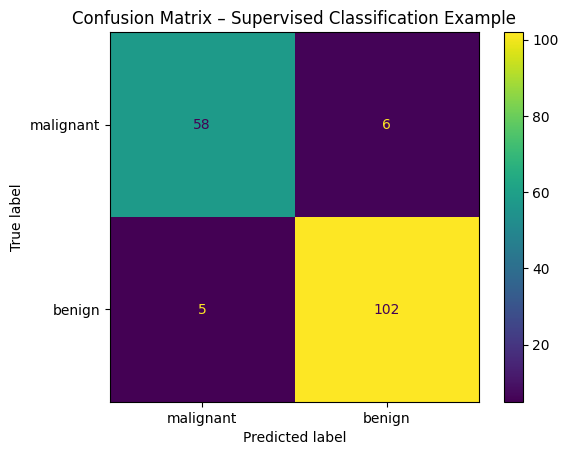

In [ ]:
# Simple supervised learning demo (classification)
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Load a labeled dataset
data = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    data.data, data.target, test_size=0.3, random_state=42, stratify=data.target
)

# Train a simple model
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.3f}")

ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred),
                       display_labels=data.target_names).plot()
plt.title("Confusion Matrix – Supervised Classification Example")
plt.show()

#### Real-world applications of Supervised Learning
- **Stock price prediction:** use historical prices and sentiment to forecast future values.  
- **Weather forecasting:** predict tomorrow’s temperature from historical data.  
- **Disease diagnosis:** classify patients based on symptoms or images.  
- **Facial recognition:** identify a person from image features.  
- **Email filtering:** classify messages as *spam* or *not spam*.  
- **Credit scoring:** predict creditworthiness from financial history.

All of these rely on **labeled datasets** and a **target variable** to predict.

#### Types of Supervised Models

Supervised models fall into **two main categories** based on the target type:

| Model Type | Target Variable | Examples | Typical Output |
|:--|:--|:--|:--|
| **Regression** | Continuous values | House prices, temperatures, stock prices | Real numbers |
| **Classification** | Discrete categories | Spam detection, disease presence, image classes | Labels |

Both use historical data to learn relationships, but differ in output and evaluation metrics.

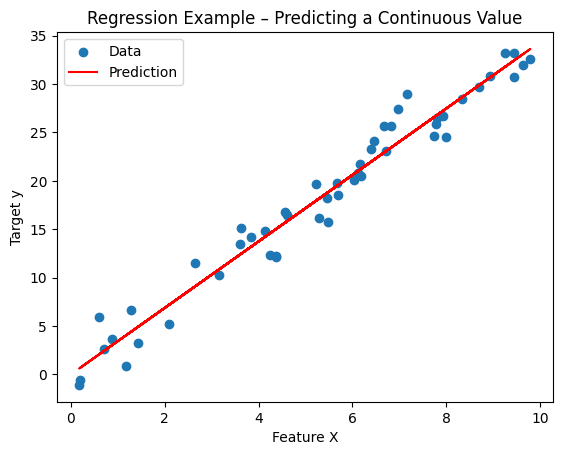

Learned slope: 3.44, intercept: -0.01


In [ ]:
# Example 1 – Regression: predict a continuous variable
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Generate simple data
np.random.seed(0)
X = np.random.rand(50, 1) * 10
y = 3.5 * X.squeeze() + np.random.randn(50) * 2

model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

plt.scatter(X, y, label="Data")
plt.plot(X, y_pred, color="red", label="Prediction")
plt.xlabel("Feature X")
plt.ylabel("Target y")
plt.title("Regression Example – Predicting a Continuous Value")
plt.legend()
plt.show()

print(f"Learned slope: {model.coef_[0]:.2f}, intercept: {model.intercept_:.2f}")

In [ ]:
# Example 2 – Classification: predict a categorical variable
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

clf = DecisionTreeClassifier(max_depth=3, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



### Choosing between Regression and Classification

Sometimes, deciding which approach to use depends on **how the target is defined**:

- “How hot is it outside?” → *Regression* (continuous temperature in °F or °C)  
- “Is it cold, warm, or hot?” → *Classification* (discrete buckets)

> The way you phrase the question defines the learning type.


When you are **not predicting** a specific target but instead want to **find structure or patterns** in data,  
you move into the realm of **Unsupervised Learning**, which we’ll cover next.

### Part 2.2 Unsupervised Learning (UL)



Unlike supervised learning, **Unsupervised Learning** does not make predictions.  
Its objective is more open-ended: to **discover structure, relationships, or patterns** within unlabeled data.

> UL models take only *features (predictors)* — there is **no target variable**.

Common goals include:
- **Dimension reduction:** condensing variables by finding underlying patterns (e.g., file compression, PCA).  
- **Clustering:** grouping observations that behave similarly (e.g., customer segmentation).





<img src="https://drive.google.com/uc?id=1_0xziXNcIY-CNy11G1x5EIOyCh0cDfUF" width="500">

#### What UL Does

UL algorithms analyze the relationships **between the predictors themselves**, not between predictors and a label.  

They are often used to:
- Reveal **hidden groupings** (clusters).  
- Find **latent factors** or **principal components** that explain variance.  
- Create **simplified representations** of complex data.  

**Examples**
- Grouping shoppers by purchasing behavior (customer segmentation).  
- Compressing high-dimensional image data into fewer features.  
- Identifying topics within a set of documents (topic modeling).

#### Advantages and Drawbacks

| Aspect | Advantage | Drawback |
|:--|:--|:--|
| **Label requirement** | No labeled data needed (easy to collect) | No true “answers” for evaluation |
| **Objective** | Discover hidden structure | No direct predictive power |
| **Evaluation** | Qualitative (visual/cluster inspection) | Hard to measure accuracy quantitatively |




<img src="https://drive.google.com/uc?id=1QG15fzHDVWFx-dXFOg0nmfyOUieUf4jY" width="500">

#### Example – K-Means Clustering

We’ll demonstrate how an unsupervised algorithm can group similar points without knowing any labels.

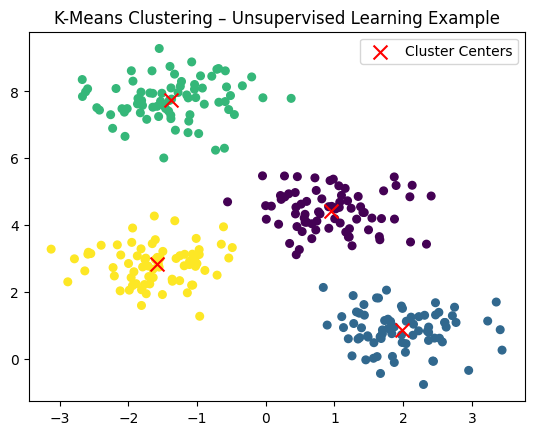

In [ ]:
# Unsupervised Learning example: K-Means clustering
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Generate synthetic data
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.6, random_state=0)

# Fit K-Means (no labels used)
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(X)
labels = kmeans.labels_

# Visualize clusters
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap="viridis", s=30)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            color="red", marker="x", s=100, label="Cluster Centers")
plt.title("K-Means Clustering – Unsupervised Learning Example")
plt.legend()
plt.show()

The model automatically identified **four groups** purely based on spatial similarity.  
There were **no labels**, yet meaningful clusters emerged.

This is the essence of unsupervised learning:
> adding structure and interpretation on top of raw, unstructured data.

---

### Key Takeaways

- UL discovers **similarities and differences** among data points.  
- It helps reveal **hidden patterns** but cannot make predictions.  
- Results usually require **human interpretation**.  
- Evaluation is often **visual or heuristic**, not accuracy-based.

---

Next, we’ll move toward a very different paradigm:  
**Reinforcement Learning (RL)** — where models learn through **interaction and feedback** rather than labels or patterns.

### Part 2.3 Reinforcement Learning (RL)

Reinforcement Learning (RL) represents a **third major branch** of machine learning, distinct from both supervised and unsupervised learning.

> In RL, algorithms—called **agents**—learn to make decisions by **interacting with an environment**.

At each step:
1. The agent observes the **current state (S)**.
2. It chooses an **action (A)** based on a **policy (π)**.
3. The environment returns a **new state (S′)** and a **reward (R)**.
4. The agent updates its policy to **maximize cumulative rewards** over time.



#### Core Idea

Reinforcement learning is about **learning through interaction** rather than supervision.

| Concept | Description |
|:--|:--|
| **Agent** | The decision-maker (e.g., robot, AI player) |
| **Environment** | The world the agent interacts with |
| **State (S)** | The current situation or observation |
| **Action (A)** | The decision the agent makes |
| **Reward (R)** | Feedback signal (positive or negative) |
| **Policy (π)** | The strategy mapping states to actions |
| **Goal** | Maximize cumulative reward over time |

Unlike supervised learning, RL **does not require labeled data** or explicit corrections.  
Instead, it relies on **trial and error**, balancing **exploration** (trying new actions)  
and **exploitation** (using known actions that yield high rewards).

#### Applications of RL

- 🎮 **Game playing:** AI agents mastering Go, chess, and complex video games.  
- 🤖 **Robotics:** robots learning locomotion, grasping, or navigation.  
- 🚗 **Autonomous driving:** real-time decision-making in dynamic traffic.  
- 💬 **AI alignment:** RL with Human Feedback (RLHF) used in models like ChatGPT to align responses with human values.



#### Example – Simple RL Environment (CartPole)

Let’s visualize an RL agent interacting with a simple environment.

We’ll use **Gymnasium (OpenAI Gym)** to simulate the classic *CartPole* task,  
where an agent must balance a pole upright by moving a cart left or right.

In [ ]:
# # Simple RL demo: CartPole random policy with inline animation (Jupyter/Colab)
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML

# 1) Create env that returns RGB frames
env = gym.make("CartPole-v1", render_mode="rgb_array")
state, info = env.reset(seed=42)

frames = []
for _ in range(400):                      # 调整步数以延长/缩短视频
    action = env.action_space.sample()
    state, reward, done, truncated, info = env.step(action)
    frames.append(env.render())
    if done or truncated:
        state, info = env.reset()

env.close()

# 2) Build animation
fig, ax = plt.subplots(figsize=(6,3.2))
ax.set_axis_off()
im = ax.imshow(frames[0])

def update(i):
    im.set_data(frames[i])
    return (im,)

# interval=33 ≈ 30 FPS；想更快/慢可改 interval
anim = animation.FuncAnimation(fig, update, frames=len(frames), interval=33, blit=True)
plt.close(fig)  # 防止重复静态图

# 3) 显示为 HTML 动画
HTML(anim.to_jshtml())

The agent here acts randomly, but a true RL algorithm (such as **Q-learning** or **Policy Gradient**)  
would iteratively improve its policy to maximize the total reward — keeping the pole balanced longer each time.

#### The RL Learning Loop

A typical RL cycle looks like this:

1. Receive **state S** from the environment.  
2. Choose **action A** according to the policy π(S).  
3. Receive **reward R** and next **state S′**.  
4. Update π to favor actions that led to higher cumulative rewards.  
5. Repeat until the policy converges.

This iterative feedback loop forms the foundation of RL-based decision making.

#### Summary

- RL learns **by interaction and feedback**, not from labeled data.  
- It optimizes behavior over time via **trial, error, and reward**.  
- Core challenge: balancing **exploration vs. exploitation**.  
- Modern breakthroughs such as **AlphaGo** and **ChatGPT (via RLHF)** rely on these ideas.  

---

**Next section:** *Comparing ML Paradigms – Pros and Cons.*

### Part 2.4 Overview of the Types of Machine Learning

Across the three major paradigms — **Supervised Learning (SL)**, **Unsupervised Learning (UL)**, and **Reinforcement Learning (RL)** —  
we can visualize the “family tree” of Machine Learning as shown below.



<img src="https://drive.google.com/uc?id=1hYIezROTe8ie6qsIyayYaKuQTpNnqRzD" width="500">



Each branch represents a distinct way that machines can learn from data:
- **SL** learns from labeled examples to make predictions.  
- **UL** finds hidden structure in unlabeled data.  
- **RL** learns through interaction and reward feedback.

#### ML Paradigms – Pros and Cons

Each learning type has unique strengths and limitations.  
Understanding these helps us decide which approach best fits a given problem.

#### 1️⃣ Supervised Machine Learning (SML)

**Definition:**  
Leverages relationships between input predictors (features) and an output response (target)  
to make predictions on new, unseen data.

**Advantages**
- Enables **predictive analysis** for future events.  
- Quantifies **relationships and effects** between variables.  
- Provides **interpretable insights** into variable interactions.

**Disadvantages**
- Requires **labeled data**, which may be **costly or scarce** to collect.

#### 2️⃣ Unsupervised Machine Learning (UML)

**Definition:**  
Discovers patterns, similarities, and structures in data **without labeled outputs**.

**Advantages**
- Reveals **hidden correlations** not easily spotted by humans.  
- Useful as a **preprocessing step** for SL (e.g., clustering or feature reduction).  
- Can use **abundant unlabeled data**.

**Disadvantages**
- **Cannot make direct predictions**.  
- **Validation is subjective**, often relying on human interpretation.

#### 3️⃣ Reinforcement Learning (RL)

**Definition:**  
Trains an agent to make decisions by interacting with an environment  
and receiving feedback in the form of **rewards or penalties**.

**Advantages**
- Develops **complex behaviors** through feedback and exploration.  
- Adaptable to **dynamic and real-world environments**.  
- Supports continuous improvement via iterative policy updates.

**Disadvantages**
- **Unpredictable initial behavior** while the agent learns.  
- **Slow convergence** — may take many iterations to learn effective strategies.  
- Risk of **over-cautious behavior**, limiting exploration to avoid penalties.

####  Summary Table

| Paradigm | Key Idea | Advantages | Disadvantages |
|:--|:--|:--|:--|
| **Supervised (SL)** | Learns from labeled data | Predictive, interpretable, quantifies relationships | Needs labeled data |
| **Unsupervised (UL)** | Finds patterns without labels | Reveals structure, handles raw data | No prediction, hard to evaluate |
| **Reinforcement (RL)** | Learns through reward feedback | Adaptive, powerful, real-world applications | Slow, unstable early learning |

---

**In summary:**
- SL provides **prediction and interpretation**.  
- UL provides **discovery and structure**.  
- RL provides **decision-making through feedback**.  

Together, these paradigms form the foundation of modern machine learning.

## Part 3 - Predicting Continuous Variables with Linear Regression





We now explore our **first true ML model** — **Linear Regression**.

Linear regression is a type of **supervised learning** used for **regression tasks**,  
where the goal is to find a **relationship between predictors (X)** and a **continuous response variable (y)**.

It’s conceptually the same as drawing a **line of best fit** through data points.

🧮 **Formal Model**

$$
y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \cdots + \beta_n x_n
$$

**where:**

- $y$: response variable  
- $x_i$: predictor (independent variable)  
- $\beta_0$: intercept  
- $\beta_i$: coefficient for $x_i$

#### Exploring the Dataset – Bike Sharing

We’ll use a public dataset from Kaggle’s *Bike Sharing Demand* competition.  
Each row represents **one hour of bike usage**, and we’ll try to **predict the number of bikes rented**.



<img src="https://drive.google.com/uc?id=1H4WRopDiyZTgR2N8ZusVoPhgqBmEEZCG" width="800">



In [ ]:
# Load the dataset
import pandas as pd
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/bikeshare.csv"
bikes = pd.read_csv(url)
bikes.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


Each row shows one observation (hour), including features such as:
- **temp** – temperature (°C)  
- **count** – number of bikes rented  
- and other columns (humidity, season, weather, etc.)

We will focus on predicting **count** (target) from **temp** (predictor).

#### Visualizing the Relationship

Let’s use **Seaborn** to draw a **line of best fit** between temperature and bike count.

🖼️ *Placeholder – Figure 10.9: Line of best fit between temperature and bike count*

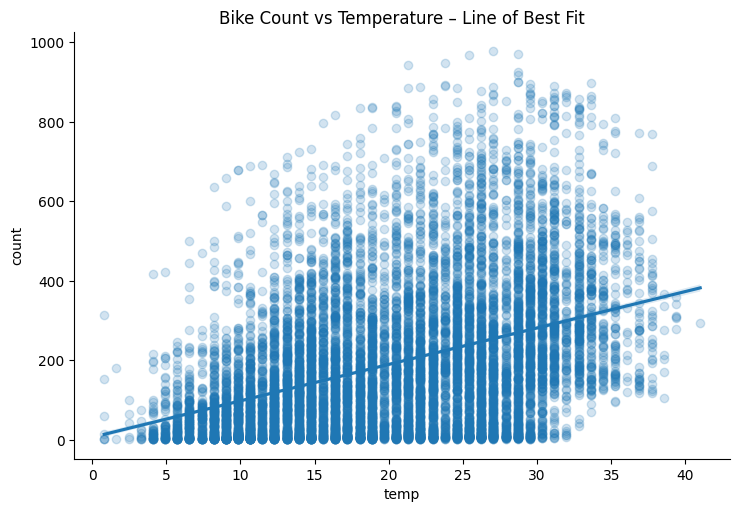

In [ ]:
import seaborn as sns

sns.lmplot(x="temp", y="count", data=bikes, aspect=1.5, scatter_kws={'alpha':0.2})
plt.title("Bike Count vs Temperature – Line of Best Fit")
plt.show()

#### Observation
It appears that as temperature increases, the number of bikes rented also increases.

We can verify this with a correlation check:

In [ ]:
# Compute correlation
bikes[["count", "temp"]].corr()

,count,temp
count,1.000000,0.394454
temp,0.394454,1.000000


A weak positive correlation (~0.39) indicates that warmer weather generally increases bike usage,  
though other factors (like season or humidity) may also play a role.

#### Preparing the Data for Modeling
We’ll define:
- **X**: predictors (features)  
- **y**: response (target variable)

In [ ]:
feature_cols = ["temp"]
X = bikes[feature_cols]
y = bikes["count"]

X.shape, y.shape

((10886, 1), (10886,))

#### Building the Linear Regression Model

We’ll use **scikit-learn’s LinearRegression** to fit a simple linear model.

In [ ]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
linreg.fit(X, y)

print("Intercept (β₀):", linreg.intercept_)
print("Coefficient (β₁):", linreg.coef_)

Intercept (β₀): 6.046212959616611
Coefficient (β₁): [9.17054048]


#### Interpretation

- **$\beta_0$ (Intercept)** = predicted number of bikes rented when temperature = $0^\circ\mathrm{C}$  
- **$\beta_1$ (Slope)** = how much the number of rentals increases for each $1^\circ\mathrm{C}$ rise in temperature  

> Example: If $\beta_0 = 6.04$ and $\beta_1 = 9.17$,  
> then each $1^\circ\mathrm{C}$ increase predicts about **9 more bikes rented**.

---

**At $0^\circ\mathrm{C}$**, about **6 bikes** are predicted to be rented — which makes sense (cold days = fewer riders!).  
Keep in mind that not every variable has a meaningful “zero” — but in this case, it does.

#### Visualizing the Fitted Model

We can plot the regression line directly using Matplotlib.

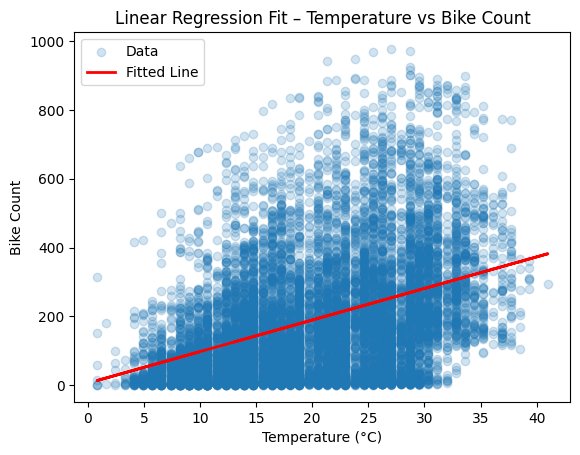

In [ ]:
# Plot regression line manually
plt.scatter(X, y, alpha=0.2, label="Data")
plt.plot(X, linreg.predict(X), color="red", linewidth=2, label="Fitted Line")
plt.xlabel("Temperature (°C)")
plt.ylabel("Bike Count")
plt.title("Linear Regression Fit – Temperature vs Bike Count")
plt.legend()
plt.show()

### Part 3.1 Correlation versus Causation

In linear regression, coefficients represent the **strength and direction** of the relationship between predictors and the response variable.  
However, these relationships indicate **correlation**, not **causation**.

Recall our previous result:
> β₁ = 9.17 → For every 1°C increase in temperature, bike rentals increase by ~9 on average.

This means:
- For every **1°C increase**, there is an **associated average increase** of about **9 rentals**.  
- The **positive sign** suggests a direct relationship — as temperature rises, rentals increase.

**But correlation ≠ causation.**  
It only shows that two variables **move together**, not that one **causes** the other to change.

#### Correlation Interpretation Example

Let’s revisit the model and compute a prediction.

In [ ]:
# Using the previous linear regression model
linreg.predict([[20]])  # temperature = 20°C

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([189.45702259])

At 20°C, our model predicts approximately **189 bikes** to be rented.  
That aligns with intuition — warmer days encourage more biking —  
but it doesn’t **prove** that temperature *causes* increased rentals.

To establish **causation**, we would need:
- Controlled experiments  
- Counterfactual modeling  
- Causal inference techniques (e.g., DAGs, instrumental variables, matching)

For now, regression tells us **how variables move together**,  
not **why** they move together.

### Part 3.2 Adding More Predictors

Temperature isn’t the only factor affecting rentals.  
We can easily include additional predictors such as **season**, **weather**, and **humidity**.

Before building the extended model, let’s look at the dataset’s key columns:

**Feature dictionary:**
- `season`: 1 = Spring, 2 = Summer, 3 = Fall, 4 = Winter  
- `holiday`: Whether the day is a holiday  
- `workingday`: Whether it’s a workday (0 = weekend/holiday)  
- `weather`:  
  - 1 = Clear / Few Clouds / Partly Cloudy  
  - 2 = Mist + Cloudy or Light Mist  
  - 3 = Light Snow / Light Rain / Scattered Clouds  
  - 4 = Heavy Rain / Thunderstorm / Snow + Fog  
- `temp`: Temperature (°C)  
- `atemp`: “Feels like” temperature  
- `humidity`: Relative humidity (%)

#### Building a Multivariable Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

# Define multiple predictors
feature_cols = ["temp", "season", "weather", "humidity"]
X = bikes[feature_cols]
y = bikes["count"]

linreg_multi = LinearRegression()
linreg_multi.fit(X, y)

# Pair feature names with coefficients
coeff_results = list(zip(feature_cols, linreg_multi.coef_))
for feature, coef in coeff_results:
    print(f"{feature:10s} → {coef:8.3f}")

temp       →    7.865
season     →   22.539
weather    →    6.670
humidity   →   -3.119



#### Interpreting the Coefficients

- **Temperature (+7.86):** For every 1°C increase, rentals increase by ~8 bikes (holding all else constant).  
- **Season (+22.54):** As season index increases (toward winter), rentals rise by ~23 bikes.  
- **Weather (+6.67):** As weather value increases (toward cloudy/rainy), rentals slightly increase.  
- **Humidity (-3.12):** Higher humidity is associated with fewer rentals.

*These results are interesting!*  
For example, one might expect fewer rentals in worse weather — but our positive coefficient suggests that other confounding factors or data distributions may influence this.


> Linear regression coefficients capture **associations**, not guaranteed **causes**.  
> Always interpret them as correlational unless supported by causal evidence.

### Part 3.3 Regression Metrics

When evaluating regression models, we often use **three core metrics**:

| Metric | Formula | Intuition |
|:--|:--|:--|
| **Mean Absolute Error (MAE)** | \( \frac{1}{n}\sum_{i=1}^n |y_i - \hat{y}_i| \) | Average magnitude of errors |
| **Mean Squared Error (MSE)** | \( \frac{1}{n}\sum_{i=1}^n (y_i - \hat{y}_i)^2 \) | Penalizes large errors more strongly |
| **Root Mean Squared Error (RMSE)** | \( \sqrt{\frac{1}{n}\sum_{i=1}^n (y_i - \hat{y}_i)^2} \) | Same scale as target, interpretable average error |

**Interpretation**
- **MAE** → Easy to interpret, less sensitive to outliers  
- **MSE** → Larger errors have a bigger effect (due to squaring)  
- **RMSE** → Most common; expresses error in the same units as the response

In [ ]:
# Example: computing MAE, MSE, RMSE manually
from sklearn import metrics
import numpy as np

true = [9, 6, 7, 6]
pred = [8, 7, 7, 12]

print("MAE :", metrics.mean_absolute_error(true, pred))
print("MSE :", metrics.mean_squared_error(true, pred))
print("RMSE:", np.sqrt(metrics.mean_squared_error(true, pred)))




MAE : 2.0
MSE : 9.5
RMSE: 3.082207001484488


These values mean the model’s predictions differ from the actual values  
by about **3 units on average** when expressed in the original scale.

#### Using RMSE to Evaluate Model Performance

Let’s compare RMSE values using different sets of predictors on our **bike-sharing dataset**.

In [ ]:
from sklearn.linear_model import LinearRegression

# --- Using only temperature ---
feature_cols = ["temp"]
X = bikes[feature_cols]
y = bikes["count"]

linreg = LinearRegression()
linreg.fit(X, y)
y_pred = linreg.predict(X)

rmse_temp = np.sqrt(metrics.mean_squared_error(y, y_pred))
print("RMSE (temp only):", round(rmse_temp, 2))

RMSE (temp only): 166.45


In [ ]:
# --- Using temperature + humidity ---
feature_cols = ["temp", "humidity"]
X = bikes[feature_cols]
y = bikes["count"]

linreg.fit(X, y)
y_pred = linreg.predict(X)

rmse_th = np.sqrt(metrics.mean_squared_error(y, y_pred))
print("RMSE (temp + humidity):", round(rmse_th, 2))

RMSE (temp + humidity): 157.8


In [ ]:
# --- Using multiple predictors ---
feature_cols = ["temp", "humidity", "season", "holiday", "workingday", "windspeed", "atemp"]
X = bikes[feature_cols]
y = bikes["count"]

linreg.fit(X, y)
y_pred = linreg.predict(X)

rmse_multi = np.sqrt(metrics.mean_squared_error(y, y_pred))
print("RMSE (multiple predictors):", round(rmse_multi, 2))

RMSE (multiple predictors): 155.76


### Result Interpretation

| Predictors Used | RMSE | Comment |
|:--|:--|:--|
| Temp only | 166.45 | Baseline model |
| Temp + Humidity | 157.79 | Slightly better |
| Multiple features | 155.75 | Best so far (on training data) |

At first glance, adding more predictors seems to improve performance.  
However — this improvement is **misleading** because we’re **testing on the same data used for training**.

#### Overfitting Warning

Fitting and predicting on the same dataset can cause **overfitting** —  
the model “memorizes” training examples rather than learning general patterns.

#### **Analogy:**  
A student who practices with the same questions that appear on the final exam will score 100%,  
but that doesn’t mean they truly understand the material.

#### Train/Test Split – Honest Evaluation

To fairly evaluate performance, we split the data into:
- **Training set** – used to fit the model  
- **Test set** – unseen data used to assess generalization

In [ ]:
from sklearn.model_selection import train_test_split

feature_cols = ["temp"]
X = bikes[feature_cols]
y = bikes["count"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_pred = linreg.predict(X_test)

rmse_split = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print("RMSE (train/test split):", round(rmse_split, 2))

RMSE (train/test split): 165.34


Typical result: **RMSE ≈ 165.34**  
This is a more *honest* performance estimate, since the model never saw the test data before.

#### Trying More Predictors

Let’s repeat the process with an additional feature.

In [ ]:
feature_cols = ["temp", "workingday"]
X = bikes[feature_cols]
y = bikes["count"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
linreg.fit(X_train, y_train)
y_pred = linreg.predict(X_test)

rmse_split_2 = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print("RMSE (temp + workingday):", round(rmse_split_2, 2))

RMSE (temp + workingday): 165.35


If the RMSE increases slightly (e.g., to 165.35),  
it suggests that **workingday** may not be strongly predictive of bike rentals.

#### The Null Model – A Baseline to Beat

Before celebrating improvements, we must ask:  
> “Is my model actually better than just guessing the average?”

Let’s compute a **null model**, which always predicts the mean bike rental count.

In [ ]:
# Compute the average (baseline prediction)
average_bike_rental = bikes["count"].mean()
print("Average hourly bike rentals:", round(average_bike_rental, 2))

# Make baseline predictions (same value for every row)
num_rows = bikes.shape[0]
null_predictions = [average_bike_rental] * num_rows

# Compute RMSE for the null model
rmse_null = np.sqrt(metrics.mean_squared_error(y, null_predictions))
print("RMSE (null model):", round(rmse_null, 2))

Average hourly bike rentals: 191.57
RMSE (null model): 181.14


**Typical results**

| Model | RMSE | Interpretation |
|:--|:--|:--|
| Null model (average only) | 181.14 | Baseline performance |
| Temp only | 166.45 | Better than baseline |
| Multiple predictors | 155.75 | Further improvement |

✅ Even our simplest regression model **beats the null model**,  
which means the model captures useful signal beyond just guessing the mean.

# Summary

- **MAE, MSE, RMSE** quantify model performance from different perspectives.  
- **Lower RMSE** means better predictive accuracy (on unseen data).  
- Always evaluate models using a **train/test split** to avoid overfitting.  
- The **null model** serves as a baseline — your model should outperform it.  

---

**End of Chapter 10:**  
We explored:
- The three paradigms of ML (SL, UL, RL)  
- Linear regression for predicting continuous outcomes  
- Model evaluation with metrics and validation splits  

Next chapters will dive into **classification**, **nonlinear models**, and **advanced validation methods**.